#### Implement a image classification model using following 4 steps

1. Loading and preprocessing the image data
2. Defining the model's architecture
3. training the model
4. Evaluating the model performance

In [11]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
%matplotlib inline

1. The CIFAR-10 dataset consists of 60000 images.
2. Each image having pixels size of 32x32x3. The 3 is for R,G,B color channels. width x height is 32 x 32.
3. There are total 10 classes.
4. Each Class having 6000 images in it.
5. There are 50000 training images and 10000 test images.
6. The CIFAR-10 dataset consists of images of 10 different classes: airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks.



   


In [12]:
# load dataset
cifar10 = tf.keras.datasets.cifar10
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [13]:
# Check shape of train_images and test_images
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [14]:
# check shape of train_labels and test_labels
y_train.shape

(50000, 1)

In [15]:
# for each image, a single value denoting the label. 
# To find out what the possible values of these labels are:
y_train.min(), y_train.max()

(0, 9)

The values of the labels range between 0 and 9, denoting 10 different classes.

In [16]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [17]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [18]:
#similarly for y_test
y_test = y_test.reshape(-1,)

In [19]:
# define the classes
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

##### Now we can plot a sample of the training images, using the plt.imshow function.

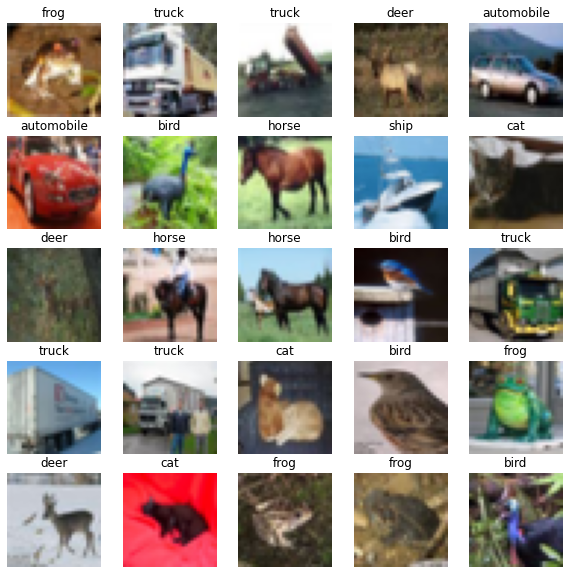

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.axis('off')
    plt.title(classes[y_train[i]])   # if array is 2d then use y_train[i,0]
plt.show()

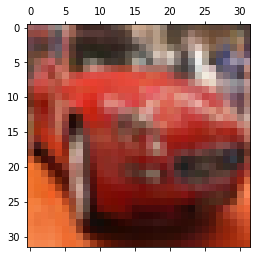

In [29]:
# or we can see the single images also
plt.matshow(x_train[5])

### Normalization:
The training set consists of 50000 images of 32x32 pixels and 3 channels (RGB values). The RGB values are between 0 and 255. For input of neural networks, it is better to have small input values. So we normalize our data between 0 and 1:

In [30]:
x_train = x_train/255
x_test = x_test/255

## Build simple artificial neural network for image classification

In [31]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [33]:
# compile the ann model
ann.compile(optimizer='SGD',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

In [35]:
# fit the ANN Model
ann.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 61s 39ms/step - loss: 1.8146 - accuracy: 0.3534
Epoch 2/5
1563/1563 [==============================] - 61s 39ms/step - loss: 1.6264 - accuracy: 0.4242
Epoch 3/5
1563/1563 [==============================] - 65s 42ms/step - loss: 1.5429 - accuracy: 0.4555
Epoch 4/5
1563/1563 [==============================] - 62s 40ms/step - loss: 1.4863 - accuracy: 0.4761
Epoch 5/5
1563/1563 [==============================] - 69s 44ms/step - loss: 1.4346 - accuracy: 0.4968


You can see that at the end of 5 epochs, accuracy is at around 49%

## Now let us build a convolutional neural network 

In [36]:
#from tensorflow.keras import datasets, layers, models
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [37]:
# compile the CNN model
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [38]:
history=cnn.fit(x_train, y_train, epochs=3,validation_data=[x_test,y_test])

Epoch 1/3
1563/1563 [==============================] - 26s 17ms/step - loss: 1.4507 - accuracy: 0.4814 - val_loss: 1.2068 - val_accuracy: 0.5727
Epoch 2/3
1563/1563 [==============================] - 25s 16ms/step - loss: 1.0977 - accuracy: 0.6172 - val_loss: 1.0684 - val_accuracy: 0.6288
Epoch 3/3
1563/1563 [==============================] - 25s 16ms/step - loss: 0.9667 - accuracy: 0.6621 - val_loss: 1.0243 - val_accuracy: 0.6425


In [39]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dense_3 (Dense)             (None, 64)               

In [40]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 1.0243 - accuracy: 0.6425


[1.0243178606033325, 0.6424999833106995]

In [41]:
y_pred = cnn.predict(x_test)
y_pred[:5]

array([[8.36612377e-03, 2.50594923e-04, 1.00211333e-02, 4.26517636e-01,
        5.58848772e-03, 5.00269711e-01, 3.60021330e-02, 8.95889476e-04,
        1.00740148e-02, 2.01431289e-03],
       [2.82299370e-02, 4.03440416e-01, 2.13010222e-04, 1.30471453e-04,
        2.87818955e-04, 3.24628058e-06, 6.66662936e-06, 1.28505835e-05,
        4.67197269e-01, 1.00478314e-01],
       [1.19562715e-01, 1.54529810e-01, 2.12292820e-02, 1.19860889e-02,
        8.70371610e-03, 2.65984959e-03, 4.50229831e-03, 4.22481960e-03,
        1.09530039e-01, 5.63071370e-01],
       [8.36930811e-01, 3.00977305e-02, 6.48545772e-02, 1.86490978e-03,
        1.42860077e-02, 1.11139118e-04, 1.32278295e-03, 5.24698000e-04,
        4.88418154e-02, 1.16533134e-03],
       [4.67173049e-05, 1.64324985e-04, 1.73476767e-02, 6.18795007e-02,
        4.25296575e-01, 1.63947046e-02, 4.78362173e-01, 2.05072909e-04,
        2.29173442e-04, 7.40831092e-05]], dtype=float32)

In [42]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[5, 8, 9, 0, 6]

In [43]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)